--------------------------------------------------------------------
          BILLAR ELIPTICO CON OBSTACULO
          TP Final Taller de Programacion
-------------------------------------------------------------------------
El usuario puede elegir: el tamano de la elipse, el tamano y posicion del
obstaculo rectangular.
La posicion y direccion inicial se asignan de manera aleatoria.



Presionar 1 para elegir tamano de la elipse y posicion del obstaculo
Presionar 2 para tamanos y posiciones por defecto
2

Insertar el numero de colisiones a graficar: 25


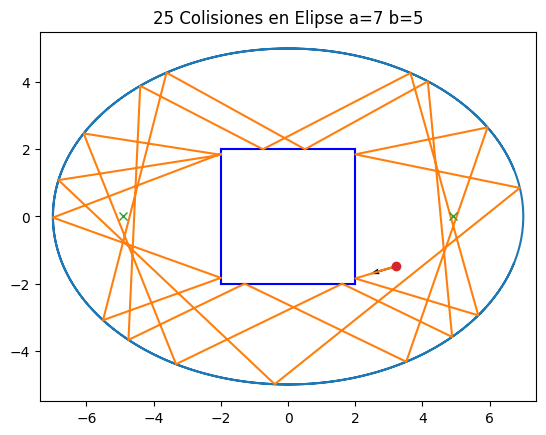

In [7]:
##--0--KALH--0--
##link Collab: https://colab.research.google.com/drive/1n9VEbz1LT6FA_c5LQhBSFt_mifOmTiq4?usp=sharing

print("""--------------------------------------------------------------------
          BILLAR ELIPTICO CON OBSTACULO
          TP Final Taller de Programacion
-------------------------------------------------------------------------
El usuario puede elegir: el tamano de la elipse, el tamano y posicion del
obstaculo rectangular.
La posicion y direccion inicial se asignan de manera aleatoria.

""")

#########Raices por Newton-Raphson################

#Calculamos la derivada de f(x)
der = lambda f, x, h: (f(x+h)-f(x-h))/(2*h)

#Input: f (funcion), x (punto inicial), k (iteraciones)
def NRroots(f, x, k):
    for i in range(k):
        if der(f, x, 0.001) != 0:
            x1 = x - f(x)/(der(f, x, 0.001))
            x = x1
        else:
            return x1
    return x

#importamos librerias
import matplotlib.pyplot as plt
import numpy as np


Manual = int(input('''
Presionar 1 para elegir tamano de la elipse y posicion del obstaculo
Presionar 2 para tamanos y posiciones por defecto
'''))

if Manual == 1:
    a = float(input("\nEje mayor de la elipse: "))
    b = float(input("Eje menor de la elipse: "))
    P1x = float(input("Posicion en x de la esquina izquierda superior del obstaculo: "))
    P1y = float(input("Posicion en y de la esquina izquierda superior del obstaculo: "))
    base = float(input("Base del obstaculo: "))
    height = float(input("Altura del obstaculo: "))
    P1 = np.array([P1x, P1y])
else: #configuracion default
    a, b = 7, 5
    height = 4  # altura del obstaculo
    base = 4  # base del obstaculo
    P1 = np.array([-2, 2])

###Dibujo de la elipse con ejes a,b###
s = np.linspace(-6, 6, 1000)

x = a * np.cos(s)
y = b * np.sin(s)

# Focos elipse
f1 = -abs((a ** 2 - b ** 2)) ** .5
f2 = abs((a ** 2 - b ** 2)) ** .5

#Generamos un vector direccion random
v = np.random.uniform(-1, 1, size=2)
#Lo normalizamos
unit_v = v/((v[0]**2 + v[1]**2)**.5)

# Generacion del Obstaculo
#     P1-------P2
#      |        |
#      |        |
#     P3-------P4

P2 = np.array([P1[0] + base, P1[1]])
P3 = np.array([P1[0], P1[1] - height])
P4 = np.array([P1[0] + base, P1[1] - height])

# Punto random en la elipse
randt = np.random.uniform(0, 2 * np.pi)
o = np.array([np.random.uniform(-a, a) * np.cos(randt), np.random.uniform(-b, b) * np.sin(randt)])
# Punto random dentro de la elipse y fuera del obstaculo
while o[0] > P1[0] and o[0] < P2[0] and o[1] > P3[1] and o[1] < P1[1]:
    randt = np.random.uniform(0, 2 * np.pi)
    o = np.array([np.random.uniform(-a, a) * np.cos(randt), np.random.uniform(-b, b) * np.sin(randt)])


# Punto colision con la Elipse
def colElips(o, unit_v):
    E2 = lambda x: (x[0] ** 2) / (a ** 2) + (x[1] ** 2) / (b ** 2) - 1
    h = lambda t: E2(t * unit_v + o)
    t = NRroots(h, 50, 800)
    pimpacto = t * unit_v + o
    return pimpacto


# Punto colision con una linea vertical
def colLinx(o, unit_v, x):
    pimpacto = ((x[1] - o[1]) / unit_v[1]) * unit_v + o
    return pimpacto


# Punto colision con una linea horizontal
def colLiny(o, unit_v, y):
    pimpacto = ((y[0] - o[0]) / unit_v[0]) * unit_v + o
    return pimpacto


###################################################################
# definicion de funcion reflexion (refleja la colision)
##################################################################


def reflexion(o, unit_v):
    """
    Calcula el punto de colision y la direccion de la particula despues
    de la colision. Principalmente lo hace particionando a la elipse de
    la siguiente manera:
        IS   MS   DS     I = Izquierda      D = Derecha     ### = Obstaculo
        DM   ###  IM     S = Superior       I = Inferior
        II   MI   DI     M = Medio          Ej: DM = Derecha Medio

    """

    # Medio Superior MS
    if o[1] >= P1[1] and o[0] >= P1[0] and o[0] <= P2[0]:

        if unit_v[1] < 0:
            pimpacto = colLinx(o, unit_v, P1)

            if pimpacto[0] <= P2[0] and P1[0] <= pimpacto[0]:
                normal = np.array([0, -1])
            else:
                pimpacto = colElips(o, unit_v)
                grad = lambda x: np.array([(2 * x[0]) / a ** 2, (2 * x[1]) / b ** 2])
                normal = grad(pimpacto) / ((grad(pimpacto)[0] ** 2 + grad(pimpacto)[1] ** 2) ** .5)

        else:
            pimpacto = colElips(o, unit_v)
            grad = lambda x: np.array([(2 * x[0]) / a ** 2, (2 * x[1]) / b ** 2])
            normal = grad(pimpacto) / ((grad(pimpacto)[0] ** 2 + grad(pimpacto)[1] ** 2) ** .5)

    # Izquierda Superior IS
    elif o[1] > P1[1] and o[0] < P1[0]:

        if unit_v[1] < 0 and unit_v[0] > 0:
            pimpacto = colLinx(o, unit_v, P1)

            if pimpacto[0] < P2[0] and P1[0] < pimpacto[0]:
                normal = np.array([0, -1])
            else:
                pimpacto = colLiny(o, unit_v, P1)

                if pimpacto[1] <= P1[1] and P3[1] <= pimpacto[1]:
                    normal = np.array([1, 0])
                else:
                    pimpacto = colElips(o, unit_v)
                    grad = lambda x: np.array([(2 * x[0]) / a ** 2, (2 * x[1]) / b ** 2])
                    normal = grad(pimpacto) / ((grad(pimpacto)[0] ** 2 + grad(pimpacto)[1] ** 2) ** .5)

        else:
            pimpacto = colElips(o, unit_v)
            grad = lambda x: np.array([(2 * x[0]) / a ** 2, (2 * x[1]) / b ** 2])
            normal = grad(pimpacto) / ((grad(pimpacto)[0] ** 2 + grad(pimpacto)[1] ** 2) ** .5)


    # Derecha Superior DS
    elif o[1] > P1[1] and o[0] > P2[0]:

        if unit_v[1] < 0 and unit_v[0] < 0:
            pimpacto = colLinx(o, unit_v, P1)

            if pimpacto[0] < P2[0] and P1[0] < pimpacto[0]:
                normal = np.array([0, -1])
            else:
                pimpacto = colLiny(o, unit_v, P2)

                if pimpacto[1] <= P2[1] and P4[1] <= pimpacto[1]:
                    normal = np.array([-1, 0])
                else:
                    pimpacto = colElips(o, unit_v)
                    grad = lambda x: np.array([(2 * x[0]) / a ** 2, (2 * x[1]) / b ** 2])
                    normal = grad(pimpacto) / ((grad(pimpacto)[0] ** 2 + grad(pimpacto)[1] ** 2) ** .5)

        else:
            pimpacto = colElips(o, unit_v)
            grad = lambda x: np.array([(2 * x[0]) / a ** 2, (2 * x[1]) / b ** 2])
            normal = grad(pimpacto) / ((grad(pimpacto)[0] ** 2 + grad(pimpacto)[1] ** 2) ** .5)

    # Izquierda Inferior II
    elif o[1] < P3[1] and o[0] < P1[0]:

        if unit_v[1] > 0 and unit_v[0] > 0:
            pimpacto = colLinx(o, unit_v, P3)

            if pimpacto[0] < P4[0] and P3[0] < pimpacto[0]:
                normal = np.array([0, 1])
            else:
                pimpacto = colLiny(o, unit_v, P1)

                if pimpacto[1] <= P1[1] and P3[1] <= pimpacto[1]:
                    normal = np.array([1, 0])
                else:
                    pimpacto = colElips(o, unit_v)
                    grad = lambda x: np.array([(2 * x[0]) / a ** 2, (2 * x[1]) / b ** 2])
                    normal = grad(pimpacto) / ((grad(pimpacto)[0] ** 2 + grad(pimpacto)[1] ** 2) ** .5)

        else:
            pimpacto = colElips(o, unit_v)
            grad = lambda x: np.array([(2 * x[0]) / a ** 2, (2 * x[1]) / b ** 2])
            normal = grad(pimpacto) / ((grad(pimpacto)[0] ** 2 + grad(pimpacto)[1] ** 2) ** .5)

    # Medio Inferior MI
    elif o[1] < P3[1] and o[0] > P1[0] and o[0] < P2[0]:

        if unit_v[1] > 0:
            pimpacto = colLinx(o, unit_v, P3)

            if pimpacto[0] <= P4[0] and P3[0] <= pimpacto[0]:
                normal = np.array([0, 1])
            else:
                pimpacto = colElips(o, unit_v)
                grad = lambda x: np.array([(2 * x[0]) / a ** 2, (2 * x[1]) / b ** 2])
                normal = grad(pimpacto) / ((grad(pimpacto)[0] ** 2 + grad(pimpacto)[1] ** 2) ** .5)

        else:
            pimpacto = colElips(o, unit_v)
            grad = lambda x: np.array([(2 * x[0]) / a ** 2, (2 * x[1]) / b ** 2])
            normal = grad(pimpacto) / ((grad(pimpacto)[0] ** 2 + grad(pimpacto)[1] ** 2) ** .5)

    # Derecha Inferior DI
    elif o[1] < P3[1] and o[0] > P2[0]:

        if unit_v[1] > 0 and unit_v[0] < 0:
            pimpacto = colLinx(o, unit_v, P3)

            if pimpacto[0] <= P4[0] and P3[0] <= pimpacto[0]:
                normal = np.array([0, 1])
            else:
                pimpacto = colLiny(o, unit_v, P2)

                if pimpacto[1] <= P2[1] and P4[1] <= pimpacto[1]:
                    normal = np.array([-1, 0])
                else:
                    pimpacto = colElips(o, unit_v)
                    grad = lambda x: np.array([(2 * x[0]) / a ** 2, (2 * x[1]) / b ** 2])
                    normal = grad(pimpacto) / ((grad(pimpacto)[0] ** 2 + grad(pimpacto)[1] ** 2) ** .5)

        else:
            pimpacto = colElips(o, unit_v)
            grad = lambda x: np.array([(2 * x[0]) / a ** 2, (2 * x[1]) / b ** 2])
            normal = grad(pimpacto) / ((grad(pimpacto)[0] ** 2 + grad(pimpacto)[1] ** 2) ** .5)

    # Derecha Medio DM-
    elif o[1] > P3[1] and o[1] < P1[1] and o[0] > P2[0]:

        if unit_v[0] < 0:
            pimpacto = colLiny(o, unit_v, P2)

            if pimpacto[1] <= P2[1] and P4[1] <= pimpacto[1]:
                normal = np.array([-1, 0])
            else:
                pimpacto = colElips(o, unit_v)
                grad = lambda x: np.array([(2 * x[0]) / a ** 2, (2 * x[1]) / b ** 2])
                normal = grad(pimpacto) / ((grad(pimpacto)[0] ** 2 + grad(pimpacto)[1] ** 2) ** .5)

        else:
            pimpacto = colElips(o, unit_v)
            grad = lambda x: np.array([(2 * x[0]) / a ** 2, (2 * x[1]) / b ** 2])
            normal = grad(pimpacto) / ((grad(pimpacto)[0] ** 2 + grad(pimpacto)[1] ** 2) ** .5)


    # Izquierdo Medio IM
    elif o[1] > P3[1] and o[1] < P1[1] and o[0] < P1[0]:

        if unit_v[0] > 0:
            pimpacto = colLiny(o, unit_v, P1)

            if pimpacto[1] <= P1[1] and P3[1] <= pimpacto[1]:
                normal = np.array([1, 0])
            else:
                pimpacto = colElips(o, unit_v)
                grad = lambda x: np.array([(2 * x[0]) / a ** 2, (2 * x[1]) / b ** 2])
                normal = grad(pimpacto) / ((grad(pimpacto)[0] ** 2 + grad(pimpacto)[1] ** 2) ** .5)

        else:
            pimpacto = colElips(o, unit_v)
            grad = lambda x: np.array([(2 * x[0]) / a ** 2, (2 * x[1]) / b ** 2])
            normal = grad(pimpacto) / ((grad(pimpacto)[0] ** 2 + grad(pimpacto)[1] ** 2) ** .5)

    else:
        pimpacto = colElips(o, unit_v)
        grad = lambda x: np.array([(2 * x[0]) / a ** 2, (2 * x[1]) / b ** 2])
        normal = grad(pimpacto) / ((grad(pimpacto)[0] ** 2 + grad(pimpacto)[1] ** 2) ** .5)

    # vector reflect = v-2P_N(v)

    PnV = np.dot(normal, unit_v) * normal
    refl_v = unit_v - 2 * PnV

    if np.dot(refl_v, normal) > 0:
        refl_v = -refl_v

    return pimpacto, refl_v


def colisiones(k, pinicial, dinicial):
    '''
    Repite la funcion reflexion k veces
    Guarda las colisiones en un array para luego graficarlas
    '''
    j = 0
    lcolisionx = np.array([pinicial[0]])
    lcolisiony = np.array([pinicial[1]])

    while j <= k:
        p1 = reflexion(pinicial, dinicial)[0]
        d1 = reflexion(pinicial, dinicial)[1]
        lcolisionx = np.append(lcolisionx, p1[0])
        lcolisiony = np.append(lcolisiony, p1[1])
        pinicial = p1
        dinicial = d1
        j += 1

    return lcolisionx, lcolisiony


k = int(input('\nInsertar el numero de colisiones a graficar: '))

# Dibujo del obstaculo rectangular
plt.plot([P1[0], P2[0]], [P1[1], P2[1]], color='b')  # P12
plt.plot([P1[0], P3[0]], [P1[1], P3[1]], color='b')  # P13
plt.plot([P3[0], P4[0]], [P3[1], P3[1]], color='b')  # P34
plt.plot([P2[0], P4[0]], [P2[1], P3[1]], color='b')  # P24

# dibujo de los ejes y las coliciones
plt.axis("equal")
plt.title(f"{k} Colisiones en Elipse a={a} b={b}")
plt.plot(x, y)
plt.quiver(o[0], o[1], unit_v[0], unit_v[1], width=0.004)  # vector direccion inicial
array_colisiones = colisiones(k - 1, o, unit_v)  # array donde se almacenan los puntos de colision(testing)
plt.plot(array_colisiones[0], array_colisiones[1])  # puntos colisiones
plt.plot([f1, f2], [0, 0], "x")  # dibujo focos elipse
plt.plot(o[0], o[1], 'o')  # dibujo punto incial

plt.show()


##CF0: ELEGIR ELIPSES EXAGERADAMENTE GRANDES ROMPE EL CODIGO
##CF1: Penseaba hacer una version con un rectangulo siempre situado en el centro de la elipse,
#      pero me parecio mas divertido poder elegir donde aparece.